In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score
from tqdm import tqdm
import numpy as np
import pickle
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def setup_plot_style():
    """Define common style elements for plots."""
    return {
        'colors': {
            'mnist': 'red',
            'densired': 'cyan', 
            'densired_soft_': 'blue',
            'blobs1_': 'purple',
            'blobs2_': 'green'
        },
        'fontsize': {
            'labels': 6,
            'ticks': 6,
            'legend': 6
        }
    }

def create_errorbar_plot(ax, data_dict, key2_labels, colors, jitter_range=(-0.1, 0.1)):
    """Create an errorbar plot for the given data."""
    for key1, subdict in data_dict.items():
        for i, key2 in enumerate(key2_labels):
            try: 
                vals = subdict[key2]
                mean_val = np.mean(vals)
                std_val = np.std(vals)
                label = key1[:-1] if key1.endswith('_') else key1
                if label == 'densired_soft':
                    label = 'densired\nsoft'
                
                ax.errorbar(
                    i + np.random.uniform(*jitter_range),
                    mean_val,
                    yerr=std_val,
                    fmt='o',
                    color=colors[key1],
                    label=label if i == 0 else "",
                    markersize=3
                )
            except:
                pass

def style_axis(ax, key2_labels, fontsize, ylabel=None):
    """Apply consistent styling to an axis."""
    ax.set_xticks(range(len(key2_labels)))
    ax.set_xticklabels(key2_labels)
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=fontsize['labels'], labelpad=2)
    ax.tick_params(labelsize=fontsize['ticks'])
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

def plot_comparison(ari_per_ds_bw, ari_overclust, figsize=(3.5, 1.8)):
    """Create a comparison plot with two subplots and outside legend."""
    style = setup_plot_style()
    key2_labels = list(next(iter(ari_per_ds_bw.values())).keys())
    
    # Create figure with gridspec
    fig = plt.figure(figsize=figsize)
    
    # Create gridspec with space for legend
    gs = fig.add_gridspec(2, 3, height_ratios=[1, 0.1], width_ratios=[1, 1, 0.3])
    
    # Create main subplot axes
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    
    # Create errorbar plots
    create_errorbar_plot(ax1, ari_per_ds_bw, key2_labels, style['colors'])
    create_errorbar_plot(ax2, ari_overclust, key2_labels, style['colors'])
    
    # Style axes
    style_axis(ax1, key2_labels, style['fontsize'], ylabel="ARI")
    style_axis(ax2, key2_labels, style['fontsize'])
    
    # Add legend to the right of the plots
    handles, labels = ax2.get_legend_handles_labels()
    legend = fig.legend(
        handles, labels,
        frameon=False,
        fontsize=style['fontsize']['legend'],
        loc='center right',
        bbox_to_anchor=(0.87, 0.6),
        handletextpad=0.01,
        scatterpoints=1
    )
    
    # Add shared x-label
    # Adjust spacing
    plt.tight_layout()
    plt.subplots_adjust(right=0.85)
    fig.text(0.4, 0.18, 'Dataset Dimension', 
             ha='center', va='center', 
             fontsize=style['fontsize']['labels'])
    return fig, (ax1, ax2)

## Stability

In [3]:
ds_pre = 'seeds_'
ds_starts = ['mnist', 'densired', 'densired_soft_', 'blobs1_', 'blobs2_']
ds_dims = [8, 16, 32, 64]
ds_end = '_35.pkl'

In [4]:
path = '/srv/user/turishcheva/cluster_vs_continuum_jan_2025/cluster_vs_continuum/cache/'
ari_per_ds_bw = {}
for ds_name in tqdm(ds_starts):
    ari_per_ds_bw[ds_name] = {}
    for dim in ds_dims:
        ari_per_ds_bw[ds_name][dim] = []
        
        with open(f'{path}stability/{ds_pre}{ds_name}{dim}{ds_end}', 'rb') as f:
            seeds_tr = pickle.load(f)
            
        with open(f'{path}{ds_name}{dim}.pickle', 'rb') as f:
            ds = pickle.load(f)
            X = ds['dataset'][0]
            true_labels = ds['dataset'][1]
        n = len(np.unique(true_labels))
        for s1, s2 in list(combinations(seeds_tr, 2)):   
            ari_per_ds_bw[ds_name][dim].append(
                adjusted_rand_score(s1.predict_with_target(X, n), 
                                    s2.predict_with_target(X, n)
                                   )
            )

100%|██████████| 5/5 [01:42<00:00, 20.46s/it]


In [5]:
path = '/srv/user/turishcheva/cluster_vs_continuum_jan_2025/cluster_vs_continuum/cache/'
ari_per_ds_bw_overcl = {}
for ds_name in tqdm(ds_starts):
    ari_per_ds_bw_overcl[ds_name] = {}
    for dim in ds_dims:
        if ds_name == 'blobs1_' and dim == 64:
            continue
        ari_per_ds_bw_overcl[ds_name][dim] = []
        
        with open(f'{path}stability/overclustering_{ds_name}{dim}.pkl', 'rb') as f:
            seeds_tr = pickle.load(f)
            
        with open(f'{path}{ds_name}{dim}.pickle', 'rb') as f:
            ds = pickle.load(f)
            X = ds['dataset'][0]
            true_labels = ds['dataset'][1]
        n = len(np.unique(true_labels))
        for s1, s2 in list(combinations(seeds_tr, 2)):   
            ari_per_ds_bw_overcl[ds_name][dim].append(
                adjusted_rand_score(s1.predict_with_target(X, n), 
                                    s2.predict_with_target(X, n)
                                   )
            )

 40%|████      | 2/5 [02:24<03:35, 71.82s/it]

6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 5 clusters i

100%|██████████| 5/5 [04:21<00:00, 52.36s/it]


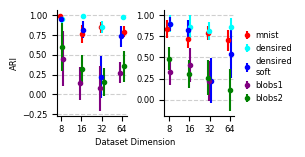

In [6]:
fig, axes = plot_comparison(ari_per_ds_bw, ari_per_ds_bw_overcl)
# pre = '/srv/user/turishcheva/cluster_vs_continuum_jan_2025/cluster_vs_continuum/'
# plt.savefig(f"{pre}figures/new_stability_with_blobs.pdf",
#             bbox_inches='tight', pad_inches=0)

## Example plot

In [7]:
import corc.utils
import os

In [ ]:
def plot_mask(transformed_points, mask, best_mask, ax, s_size, title=""):
    ax.scatter(
        transformed_points[mask, 0],
        transformed_points[mask, 1],
        c="black",
        s=s_size,
        label="Correctly Classified",
    )
    ax.scatter(
        transformed_points[~mask, 0],
        transformed_points[~mask, 1],
        c="red",
        s=s_size,
        label="Misclassified",
    )
    ax.scatter(
        transformed_points[~best_mask, 0],
        transformed_points[~best_mask, 1],
        c="orange",
        s=s_size,
        label="always Misclassified",
    )
    ax.set_title(title, fontsize=6 , pad=3)

In [8]:
def create_plot_claude(X, transformed_points, y, tmm_model, seed=None, n_components=None):
    """
    Create a visualization grid comparing different clustering methods.
    
    Parameters:
    -----------
    X : np.ndarray
        Original input data
    transformed_points : np.ndarray
        2D transformed points for visualization (e.g., from t-SNE)
    y : np.ndarray
        Ground truth labels
    tmm_model : object
        TMM model instance
    seed : int, optional
        Random seed for reproducibility
    n_components : int, optional
        Number of components used in the transformation
    
    Returns:
    --------
    matplotlib.figure.Figure
        The completed figure
    """
    
    def plot_single_cluster(ax, points, labels, centers=None, title=None):
        """Helper function to plot a single cluster visualization."""
        ax.scatter(points[:, 0], points[:, 1], c=labels, cmap="viridis", s=SCATTER_SIZE)
        if centers is not None:
            ax.scatter(centers[:, 0], centers[:, 1], c="red", marker="x", s=MARKER_SIZE)
        if title:
            ax.set_title(title)
        ax.axis('off')

    def add_row_label(ax, label):
        """Helper function to add consistent row labels."""
        ax.text(-0.05, 0.5, label, transform=ax.transAxes,
                fontsize=6, rotation=90, va='center', ha='right')

    # Constants
    MARKER_SIZE = 12
    SCATTER_SIZE = 0.2
    N_ROWS, N_COLS = 2, 4
    fontsize = 6
    # Setup figure
    fig, axs = plt.subplots(N_ROWS, N_COLS, figsize=(3.5, 2.3))
    for ax in axs.flat:
        ax.set_aspect('equal') 
    # plt.subplots_adjust(wspace=-0.2, hspace=0.1)  # Reduced spacing between subplots
    for ax in axs.flat:
        ax.axis('off')

    # # Add row labels
    # row_labels = {
    #     0: ["Ground Truth", "Dip-stats"],
    #     1: ["Nearest Neighbor", "MDP (ours)"]
    # }
    # for row in [0, 1]:
    #     add_row_label(axs[row, 0], row_labels[row][0])
    #     add_row_label(axs[row, 2], row_labels[row][1])

    # Get centers in transformed space
    centers = corc.utils.snap_points_to_TSNE(
        tmm_model.mixture_model.centers, X, transformed_points
    )
    
    # 1. Ground Truth
    y_best = corc.utils.best_possible_labels_from_overclustering(
        y, tmm_model.mixture_model.predict(X)
    )
    correct_mask = y == y_best
    plot_single_cluster(axs[0, 0], transformed_points, y)
    axs[0, 0].set_title("Ground Truth", fontsize=fontsize, pad=3)
    plot_mask(
        transformed_points,
        correct_mask,
        correct_mask,
        axs[0, 1],
        title=f"ARI: {adjusted_rand_score(y, y_best):.2f}",
        s_size=SCATTER_SIZE
    )

    # 2. Baseline (Nearest Neighbor)
    y_baseline = get_baseline_predictions(tmm_model, X, y)
    plot_single_cluster(axs[1, 0], transformed_points, y_baseline, centers)
    axs[1, 0].set_title("Nearest\nNeighbor", fontsize=fontsize, pad=0)
    plot_mask(
        transformed_points,
        (y == y_baseline),
        correct_mask,
        axs[1, 1],
        title=f"ARI: {adjusted_rand_score(y, y_baseline):.2f}",
        s_size=SCATTER_SIZE
    )

    # 3. Dip-stats
    y_dip = get_dip_stat_predictions(tmm_model, X, y)
    plot_single_cluster(axs[0, 2], transformed_points, y_dip, centers)
    axs[0, 2].set_title("Dip-stats", fontsize=fontsize, pad=3)
    plot_mask(
        transformed_points,
        (y == y_dip),
        correct_mask,
        axs[0, 3],
        title=f"ARI: {adjusted_rand_score(y, y_dip):.2f}",
        s_size=SCATTER_SIZE
    )

    # 4. Our method (MDP)
    y_pred = tmm_model.predict_with_target(X, len(np.unique(y)))
    y_pred = corc.utils.reorder_colors(y_pred, y)
    plot_single_cluster(axs[1, 2], transformed_points, y_pred, centers)
    axs[1, 2].set_title("NEB (ours)", fontsize=fontsize, pad=3)
    plot_mask(
        transformed_points,
        (y == y_pred),
        correct_mask,
        axs[1, 3],
        title=f"ARI: {adjusted_rand_score(y, y_pred):.2f}",
        s_size=SCATTER_SIZE
    )
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.1, hspace=0.2)
    return fig

def get_baseline_predictions(tmm_model, X, y):
    """Get predictions using the baseline nearest neighbor method."""
    y_pred_full = tmm_model.mixture_model.predict(X)
    y_baseline = corc.utils.predict_by_joining_closest_clusters(
        centers=tmm_model.mixture_model.centers,
        y_pred=y_pred_full,
        num_classes=len(np.unique(y)),
        dip_stat=False,
        data=X
    )
    return corc.utils.reorder_colors(y_baseline, y)

def get_dip_stat_predictions(tmm_model, X, y):
    """Get predictions using the dip-stats method."""
    y_pred = tmm_model.predict(X)
    y_dip = corc.utils.predict_by_joining_closest_clusters(
        centers=tmm_model.mixture_model.centers,
        y_pred=np.asarray(y_pred.tolist()),
        num_classes=len(np.unique(y)),
        dip_stat=True,
        data=tmm_model.data
    )
    return corc.utils.reorder_colors(y_dip, y)

successfully loaded model from disk
joined 12 and 21 (both now in class 12)
joined 14 and 17 (both now in class 14)
joined 0 and 16 (both now in class 0)
joined 0 and 18 (both now in class 0)
joined 10 and 14 (both now in class 10)
joined 6 and 20 (both now in class 6)
joined 4 and 8 (both now in class 4)
joined 2 and 22 (both now in class 2)
joined 4 and 24 (both now in class 4)
joined 7 and 15 (both now in class 7)
joined 3 and 9 (both now in class 3)
joined 4 and 7 (both now in class 4)
joined 5 and 23 (both now in class 5)
joined 1 and 10 (both now in class 1)
joined 11 and 19 (both now in class 11)
joined 9 and 10 (both now in class 9)
joined 21 and 22 (both now in class 21)
joined 9 and 17 (both now in class 9)
joined 2 and 19 (both now in class 2)
joined 7 and 16 (both now in class 7)
joined 1 and 2 (both now in class 1)
joined 0 and 15 (both now in class 0)
joined 9 and 13 (both now in class 9)
joined 9 and 14 (both now in class 9)
joined 11 and 12 (both now in class 11)
joined

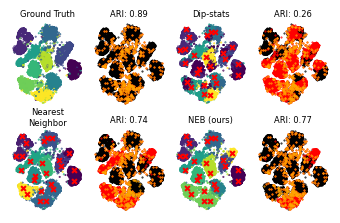

In [15]:
n_components = 25
dataset_name = 'mnist8'
cache_path = '/srv/user/turishcheva/cluster_vs_continuum_jan_2025/cluster_vs_continuum/cache/'
seed = 42

X, y, transformed_points = corc.utils.load_dataset(
    dataset_name=dataset_name, cache_path=cache_path
)

# load tmm model
alg_filename = f"{cache_path}stability/seeds_{dataset_name}_{n_components}.pkl"
if not os.path.exists(alg_filename):
    print(f"File {alg_filename} not found. training a new model.")
    # return -1
    tmm_model = corc.graph_metrics.neb.NEB(
        data=X, labels=y, n_components=n_components, optimization_iterations=500, seed=seed,
    )
    tmm_model.fit(X)
    with open(alg_filename, "wb") as f:
        pickle.dump(tmm_model, f)
else:
    with open(alg_filename, "rb") as f:
        tmm_models = pickle.load(f)
        print("successfully loaded model from disk")
        
tmm_model = tmm_models[0]
figure = create_plot_claude(
    X=X, transformed_points=transformed_points, y=y, tmm_model=tmm_model, seed=seed, n_components=n_components
)
# plt.savefig(f"{pre}figures/claude_neb_join_strategies_{dataset_name}_seed_{seed}_n_components_{n_components}.pdf",
#             bbox_inches='tight', pad_inches=0)